# Regression

EDA and Regression test using the red wine dataset from: https://archive.ics.uci.edu/ml/datasets/wine+quality

Purpose: apply skills learned from ML A-Z on an unknown dataset to atempt to predict the quality of red wine.  The dataset contains the following information:

    Input variables (based on physicochemical tests): 
        1 - fixed acidity 
        2 - volatile acidity 
        3 - citric acid 
        4 - residual sugar 
        5 - chlorides 
        6 - free sulfur dioxide 
        7 - total sulfur dioxide 
        8 - density 
        9 - pH 
        10 - sulphates 
        11 - alcohol 
    Output variable (based on sensory data): 
        12 - quality (score between 0 and 10)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [241]:
df = pd.read_csv('wine.csv', header=0)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Distribution of the dependant variable

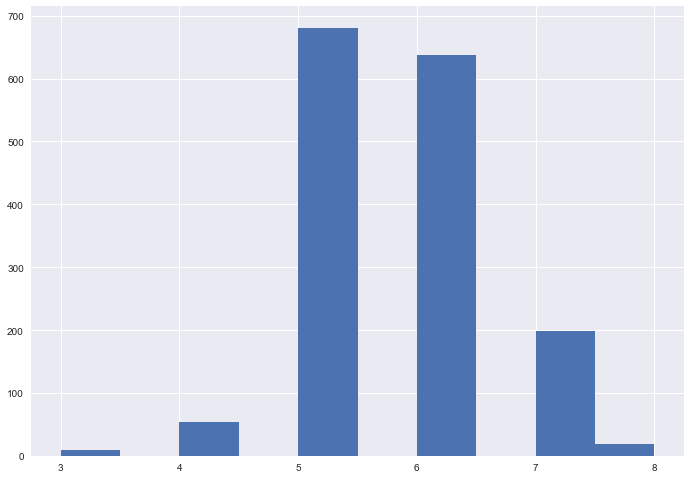

In [39]:
df.quality.hist()

### Feature Distribution

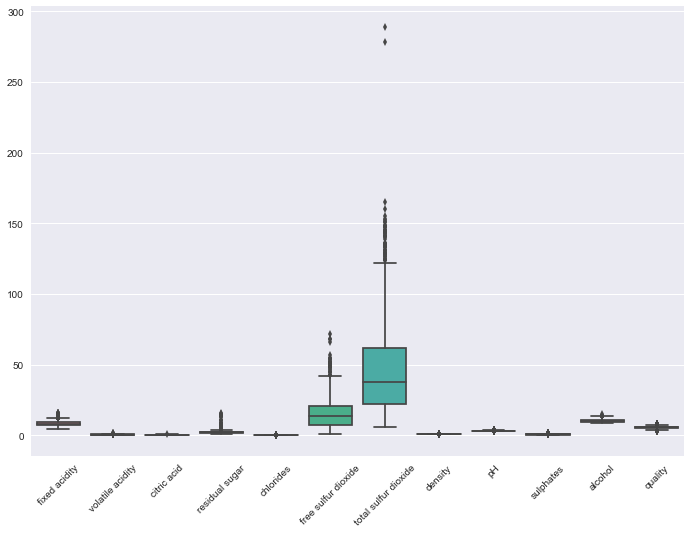

In [37]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.set(rc={'figure.figsize':(11.7,8.27)})
# Boxplot
g = sns.boxplot(data=df)

### Show the scatterplots and histograms between independant and dependant variables

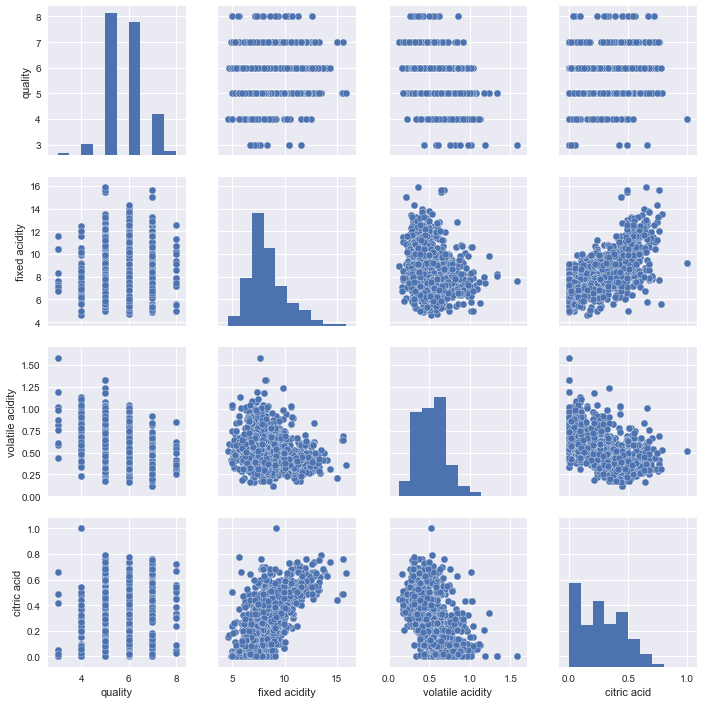

In [46]:
g = sns.pairplot(df[['quality','fixed acidity', 'volatile acidity', 'citric acid']],  diag_kind='hist')

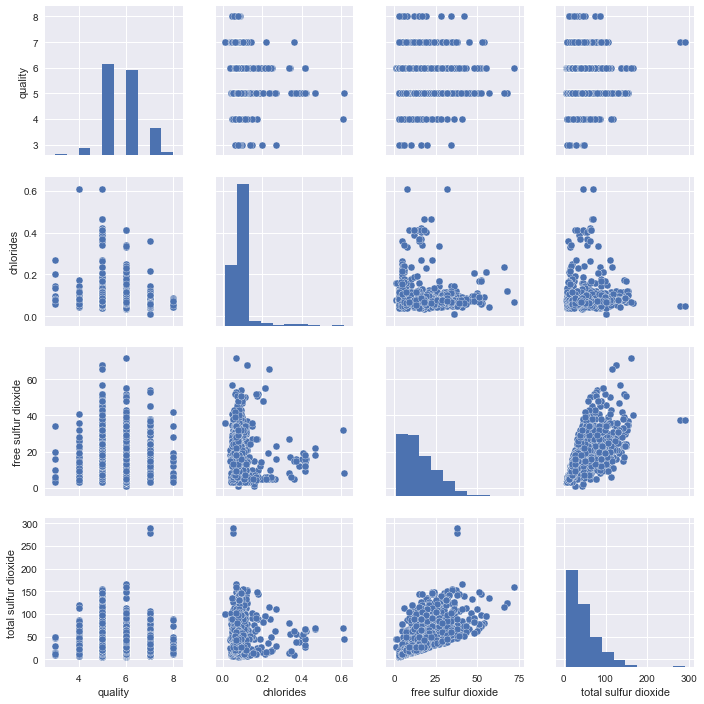

In [48]:
g = sns.pairplot(df[['quality','chlorides', 'free sulfur dioxide', 'total sulfur dioxide']],  diag_kind='hist')

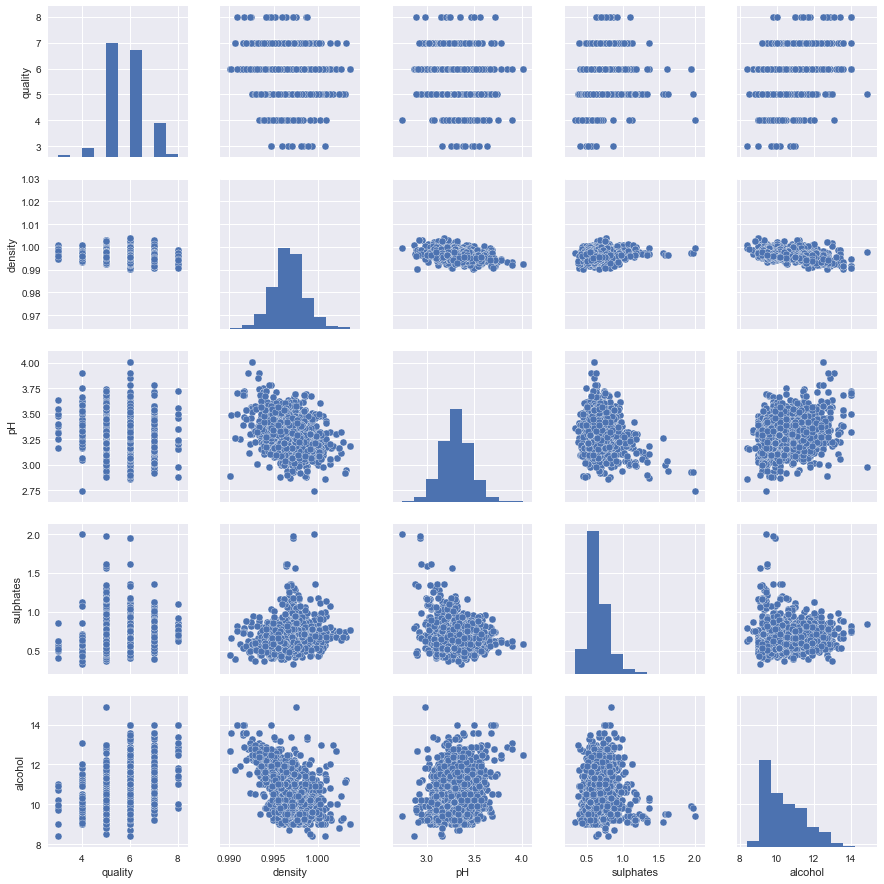

In [50]:
g = sns.pairplot(df[['quality','density', 'pH', 'sulphates', 'alcohol']],  diag_kind='hist')

# View the correlation

In [116]:
dfcorr = df.corr()

In [117]:
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Display the top correlated variables

In [141]:
dfcov.quality.sort_values(ascending=False)

quality                 0.652168
alcohol                 0.409789
fixed acidity           0.174424
citric acid             0.035612
sulphates               0.034413
residual sugar          0.015635
density                -0.000267
chlorides              -0.004900
pH                     -0.007198
volatile acidity       -0.056476
free sulfur dioxide    -0.427907
total sulfur dioxide   -4.917237
Name: quality, dtype: float64

## Plot the correlation

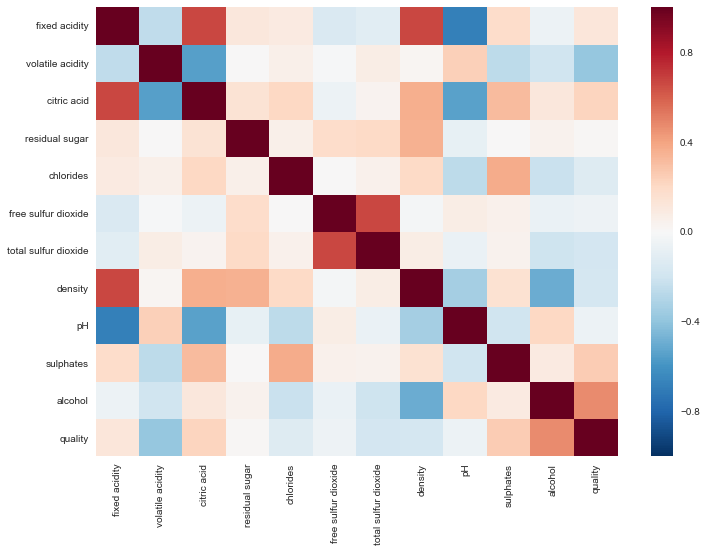

In [64]:
sns.heatmap(dfcorr)

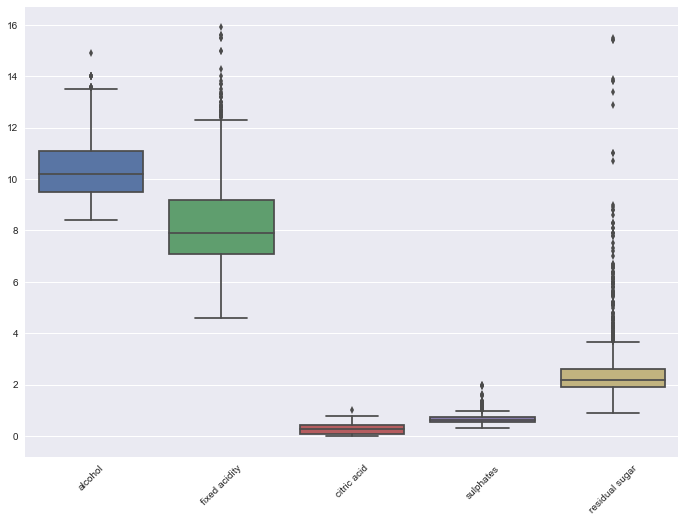

In [266]:
# checkout top features from correlation
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.set(rc={'figure.figsize':(11.7,8.27)})
# Boxplot
g = sns.boxplot(data=df[['alcohol','fixed acidity', 'citric acid', 'sulphates', 'residual sugar']])

## Multi Linear Regression all features

In [213]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 11].values

# test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

27.1588691852 %


### Wow the score is quite low.  Next try forward propagation to see if there is any predictive power using less variables.

In [175]:
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
X_opt = X[:, :10]

In [176]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()

### Review the Ordinary Least Squares information from the model

In [182]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     78.81
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.61e-98
Time:                        11:03:44   Log-Likelihood:                -1688.6
No. Observations:                1599   AIC:                             3393.
Df Residuals:                    1591   BIC:                             3436.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.8240     13.927     14.922      0.000     180.507     235.141
x1             0.1398      0.018      7.693      0.000       0.104       0.175
x2             0.4960      0.131      3.800      0.000       0.240       0.752
x3             0.0868      0.014      6.243      0.000       0.060       0.114
x4            -3.5745      0.411     -8.691      0.000      -4.381      -2.768
x5            -0.0039      0.002     -2.254      0.024      -0.007      -0.001
x6          -204.9672     14.087    -14.550      0.000    -232.599    -177.336
x7             1.4724      0.115     12.754      0.000       1.246       1.699
==============================================================================
Omnibus:                       21.874   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.957
Skew:                          -0.161   Prob(JB):                     3.13e-07
Kurtosis:                       3.588   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Use a helper method to process all variables using Forward Propagation

In [201]:
## ref: https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    
    return model

## The top features using Forward Propagation

In [205]:
import pandas as pd

df2 = df
df2.columns = df.columns.str.replace('\s+', '_') 
model = forward_selected(df2, 'quality')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides + pH + free_sulfur_dioxide + citric_acid + 1
0.356706013537


## Random Forest

Test to see if better results can be found using Random Forest

In [260]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:,:-1].values
Y = df['quality'].values
names = df.columns.tolist()
names.remove('quality')
 
classifier = RandomForestRegressor(n_estimators=20, max_depth=4)

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

accuracy = classifier.score(X_test,y_test)
print(accuracy*100,'%')          

20.426839257 %


### Display Important features from Random Forest

In [258]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(importances)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.404364)
2. feature 0 (0.210487)
3. feature 4 (0.143357)
4. feature 1 (0.129642)
5. feature 3 (0.091050)
6. feature 5 (0.021100)


### Reclassify with important features (0-4)

In [262]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 11].values

# test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


X = df.iloc[:,:-1].values
Y = df['quality'].values
names = df.columns.tolist()
names.remove('quality')
 
classifier = RandomForestRegressor(n_estimators=20, max_depth=4)

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

accuracy = classifier.score(X_test,y_test)
print(accuracy*100,'%')


13.4758719463 %


# Conculsion
#### Either there is not a enough data to predict wine quality from the chemical data provided or the chemical makeup of red wine has no affect on quality